# Main Library

In [21]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Make Preprocessing Data
# from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

# Make Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D

# Download Model
import pickle

In [22]:
data_train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\digit-recognizer\train.csv")
data_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\digit-recognizer\test.csv")
data_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


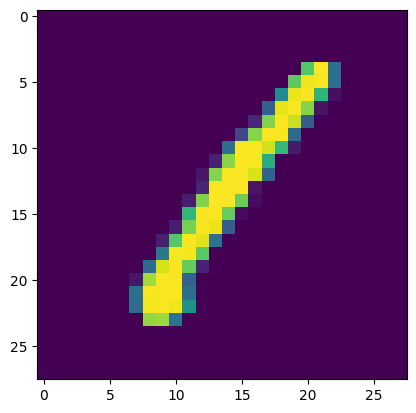

In [4]:
plt.imshow(np.reshape(data_train.iloc[0][1:].values.astype('uint8'), (28, 28, 1)))

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
data_train.shape, data_test.shape

((42000, 785), (28000, 784))

## Over Sampling

In [7]:
X = data_train.drop(columns="label", axis=1)
Y = data_train["label"]
data_train["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
smote = SMOTE()
new_x, new_y = smote.fit_resample(X, Y)
data_train = pd.concat([new_x, new_y], axis=1)

In [9]:
data_train["label"].value_counts()

label
1    4684
0    4684
4    4684
7    4684
3    4684
5    4684
8    4684
9    4684
2    4684
6    4684
Name: count, dtype: int64

In [10]:
x_train, y_train = data_train.drop(columns="label", axis=1), data_train["label"]

In [11]:
x_train.shape, y_train.shape

((46840, 784), (46840,))

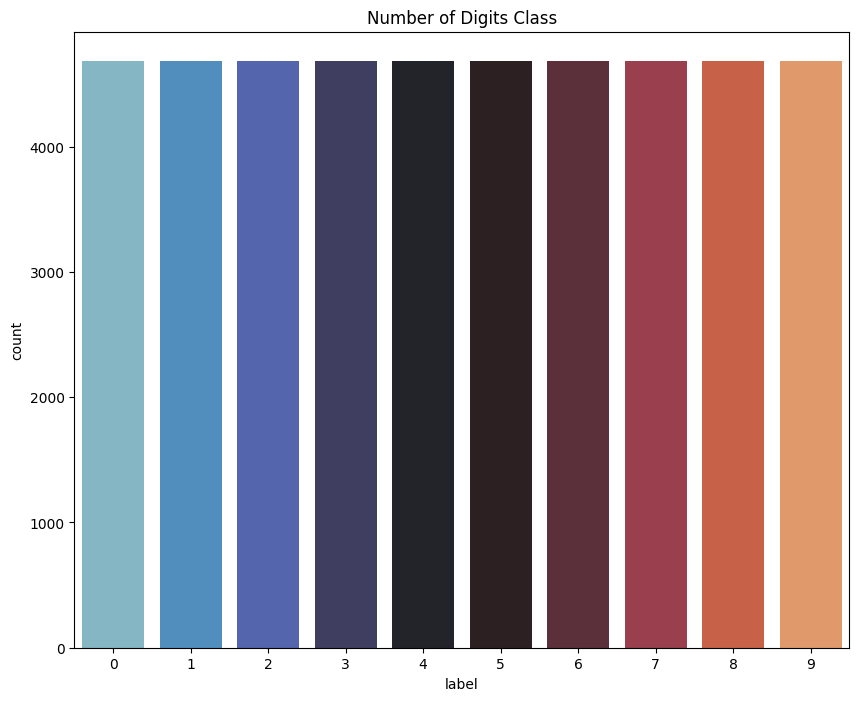

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x =y_train, palette="icefire")
plt.title("Number of Digits Class")
plt.show()

## Make Reshape ==> data From 784 to (28, 28, 1)

In [13]:
x_train = x_train / 255.0
data_test = data_test / 255.0

print(x_train.shape, data_test.shape)

(46840, 784) (28000, 784)


In [14]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
print(x_train.shape)

data_test = np.reshape(data_test, (-1, 28, 28, 1))
print(data_test.shape)

(46840, 28, 28, 1)
(28000, 28, 28, 1)


In [15]:
print("x_train shape: ",x_train.shape)
print("test shape: ",data_test.shape)

x_train shape:  (46840, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## Make Augmentation

In [16]:
data_Aug = tf.keras.Sequential([
        k.layers.RandomFlip("horizontal", (28, 28, 3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.124),
        ])

In [17]:
images = []
label_image = []

for i in range(46840):
    for j in range(3):
        new_img = data_Aug(tf.expand_dims(x_train[i], 0))[0]
        images.append(new_img)
        label_image.append(y_train[i])

In [18]:
print("images shape: ", len(images))
print("label_image shape: ",len(label_image))

images shape:  140520
label_image shape:  140520


In [19]:
x_train = np.array(images)
y_train = np.array(label_image)

In [24]:
x_train, y_train = shuffle(x_train, y_train, random_state=2)

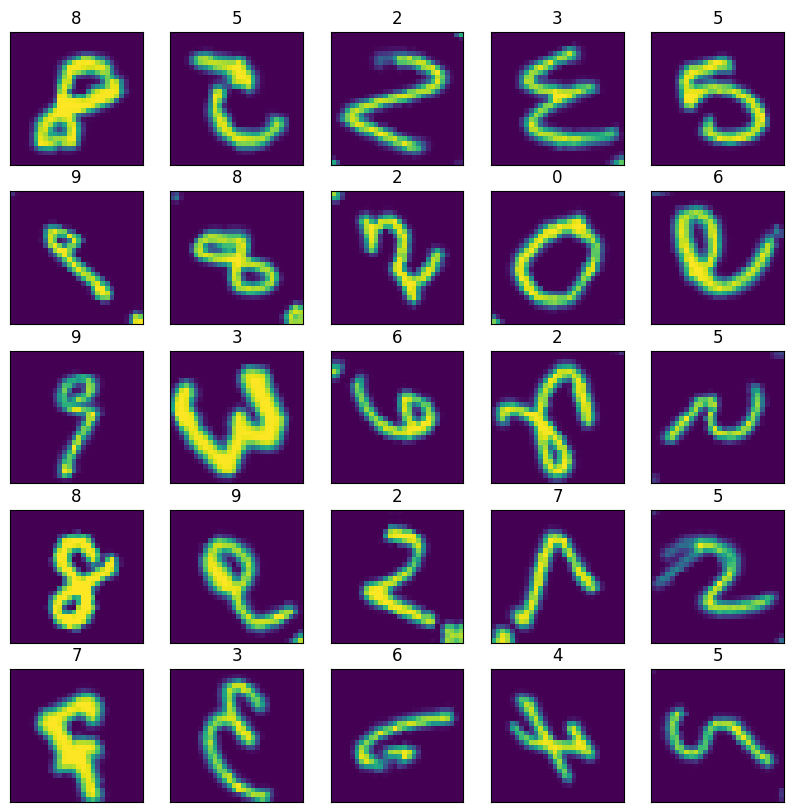

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [26]:
print("x_train shape: ",x_train.shape)
print("test shape: ", y_train.shape)

x_train shape:  (140520, 28, 28, 1)
test shape:  (140520,)


In [27]:
label_image = to_categorical(y_train, 10)
label_image[0], label_image.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), (140520, 10))

# Splitting Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_train, label_image, train_size=0.8, random_state=42)

In [29]:
print("x_train - shape =", x_train.shape)
print("x_test - shape =", x_test.shape)
print("y_train - shape =", y_train.shape)
print("y_test - shape =", y_test.shape)

x_train - shape = (112416, 28, 28, 1)
x_test - shape = (28104, 28, 28, 1)
y_train - shape = (112416, 10)
y_test - shape = (28104, 10)


## Create CNN Model

In [33]:
model = k.models.Sequential()
# CNN
model.add(k.layers.Conv2D(8, (5, 5), input_shape=(28, 28, 1), activation="relu" ,padding="same"))
model.add(k.layers.Conv2D(32, (3, 3), activation="relu" ,padding="valid"))

model.add(k.layers.AveragePooling2D((2, 2)))
model.add(k.layers.Conv2D(64, (3, 3), activation="relu" ,padding="valid"))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu" ,padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))


model.add(k.layers.Conv2D(128, (3, 3), activation="relu" ,padding="same"))
model.add(Dropout(0.4))

# ANN
model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))

model.add(k.layers.Dense(10, activation="softmax"))

In [34]:
model.compile(optimizer=tf.optimizers.Adam(0.001, beta_1=0.86, beta_2=0.999), loss=tf.losses.CategoricalCrossentropy(),
             metrics=["accuracy"])

In [35]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/10
3513/3513 [==============================] - 128s 36ms/step - loss: 0.4567 - accuracy: 0.8533 - val_loss: 0.1599 - val_accuracy: 0.9505
Epoch 2/10
3513/3513 [==============================] - 127s 36ms/step - loss: 0.1981 - accuracy: 0.9401 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 3/10
3513/3513 [==============================] - 127s 36ms/step - loss: 0.1610 - accuracy: 0.9518 - val_loss: 0.1083 - val_accuracy: 0.9674
Epoch 4/10
3513/3513 [==============================] - 111s 32ms/step - loss: 0.1358 - accuracy: 0.9587 - val_loss: 0.0949 - val_accuracy: 0.9713
Epoch 5/10
3513/3513 [==============================] - 106s 30ms/step - loss: 0.1220 - accuracy: 0.9632 - val_loss: 0.0968 - val_accuracy: 0.9705
Epoch 6/10
3513/3513 [==============================] - 105s 30ms/step - loss: 0.1142 - accuracy: 0.9650 - val_loss: 0.0920 - val_accuracy: 0.9722
Epoch 7/10
3513/3513 [==============================] - 106s 30ms/step - loss: 0.1055 - accuracy: 0.9678 - val_loss: 0

In [36]:
loss, acc = model.evaluate(x_test, y_test)

print("The Accuracy Training Data is ", round(acc, 4))
print("The loss Training Data is ", round(loss, 4))

879/879 [==============================] - 7s 7ms/step - loss: 0.0958 - accuracy: 0.9714
The Accuracy Training Data is  0.9714
The loss Training Data is  0.0958


In [38]:
model.fit(x_test, y_test, epochs=5, validation_data=(x_train, y_train), validation_split=0.2)

In [39]:
loss, acc = model.evaluate(x_test, y_test)

print("The Accuracy Training Data is ", round(acc, 4))
print("The loss Training Data is ", round(loss, 4))

# Prediction

In [34]:
prediction = model.predict(data_test)
prediction = [pre.argmax() for pre in prediction]

875/875 [==============================] - 4s 4ms/step


In [35]:
prediction[0:5]

[2, 0, 9, 9, 3]

In [36]:
submition = pd.DataFrame({"imageid": range(1, len(prediction)+1),
                          "Label": prediction})

In [37]:
submition.head(5)

,imageid,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [38]:
submition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\digit-recognizer\Submition.csv", index=False)

## Create Pretraining Model

In [17]:
x_train_1 = x_train.astype("float32")
new_xtrain = []
for image in x_train_1:
    new_image = cv2.resize(image, (128, 128))
    new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
    new_xtrain.append(new_image)
    
new_xtrain = np.array(new_xtrain)
new_xtrain.shape

(33600, 128, 128, 3)

In [18]:
x_test_1 = x_test.astype("float32")
new_xtest = []
for image in x_test_1:
    new_image = cv2.resize(image, (128, 128))
    new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
    new_xtest.append(new_image)
    
new_xtest = np.array(new_xtest)
new_xtest.shape

(8400, 128, 128, 3)

In [24]:
data_test = data_test.astype("float32")
new_test = []
for image in data_test:
    new_image = cv2.resize(image, (128, 128))
    new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
    new_test.append(new_image)
    
new_test = np.array(new_test)
new_test.shape

(28000, 128, 128, 3)

In [26]:
model_mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(128, 128, 3))

In [27]:
model_1 = k.models.Sequential()
for layer in model_mobilenet.layers[:-1]:
    model_1.add(layer)
for layers in model_1.layers:
    layers.trainable = False

In [28]:
model_1.add(Dense(10, activation="softmax"))
model_1.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
# model_1.summary()

In [29]:
history = model_1.fit(new_xtrain, y_train, epochs=10, validation_data=(new_xtest, y_test) ,validation_split=20)

Epoch 1/10
1050/1050 [==============================] - 171s 157ms/step - loss: 0.2268 - accuracy: 0.9333 - val_loss: 0.1183 - val_accuracy: 0.9632
Epoch 2/10
1050/1050 [==============================] - 147s 140ms/step - loss: 0.1178 - accuracy: 0.9647 - val_loss: 0.1011 - val_accuracy: 0.9708
Epoch 3/10
1050/1050 [==============================] - 147s 140ms/step - loss: 0.1085 - accuracy: 0.9689 - val_loss: 0.1790 - val_accuracy: 0.9558
Epoch 4/10
1050/1050 [==============================] - 146s 140ms/step - loss: 0.1041 - accuracy: 0.9717 - val_loss: 0.1311 - val_accuracy: 0.9680
Epoch 5/10
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0928 - accuracy: 0.9759 - val_loss: 0.1036 - val_accuracy: 0.9764
Epoch 6/10
1050/1050 [==============================] - 152s 145ms/step - loss: 0.0910 - accuracy: 0.9758 - val_loss: 0.1990 - val_accuracy: 0.9556
Epoch 7/10
1050/1050 [==============================] - 152s 144ms/step - loss: 0.0824 - accuracy: 0.9779 - val_

In [ ]:
loss, accuracy = model_1.evaluate(new_xtest, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

In [50]:
prediction_mo = model_1.predict(new_test)
prediction_mo = [pre.argmax() for pre in prediction_mo]

In [57]:
submition_2 = pd.DataFrame({"imageid": range(1, len(prediction_mo)+1),
                             "Label": prediction_mo})